In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("/content/cleaned_student_data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.296250,1.773994,-0.884382,0.663124,-0.956359,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.079265,1.832796,0.651195,-1.731343,-0.750295,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.047801,-1.023317,-0.357863,-0.233684,0.801537,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-4.149161,-1.136386,-0.481705,0.055879,1.871249,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-2.393534,-1.761910,1.372795,-0.369802,2.048341,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
task2_model = joblib.load("/content/final_model.pkl")

In [17]:
task2_pred = task2_model.predict(X_test)
task2_r2 = r2_score(y_test, task2_pred)
task2_mae = mean_absolute_error(y_test, task2_pred)
task2_rmse = np.sqrt(mean_squared_error(y_test, task2_pred))
task2_r2, task2_mae, task2_rmse

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(0.0, 0.0175, np.float64(0.04123105625617661))

In [21]:
nn_model = Sequential()
nn_model.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],)))
nn_model.add(Dense(16, activation="relu"))
nn_model.add(Dense(1))
nn_model.compile(optimizer=Adam(),loss="mse")
early_stop = EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)
history = nn_model.fit(X_train,y_train,validation_split=0.2,epochs=50,
                       batch_size=8,callbacks=[early_stop],verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1376 - val_loss: 0.0345
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0420 - val_loss: 0.0244
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0393 - val_loss: 0.0268
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0399 - val_loss: 0.0258
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0422 - val_loss: 0.0223
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0160 - val_loss: 0.0217
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - val_loss: 0.0221
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0092 - val_loss: 0.0233
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0068 - val_loss: 0.0246
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0068 - val_loss: 0.0258
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - val_loss: 0.0251


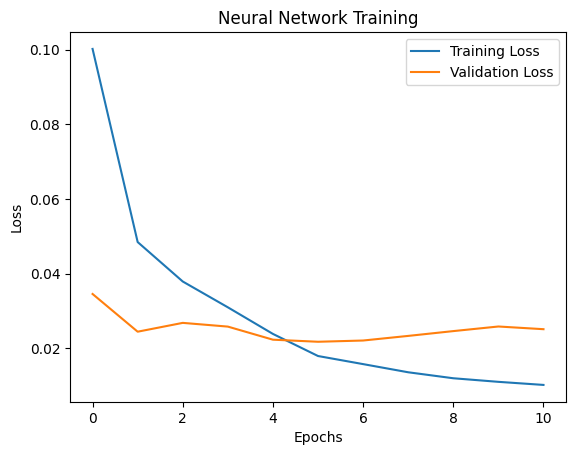

In [22]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network Training")
plt.legend()
plt.show()

In [23]:
nn_pred = nn_model.predict(X_test).flatten()
nn_r2 = r2_score(y_test, nn_pred)
nn_mae = mean_absolute_error(y_test, nn_pred)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))
nn_r2, nn_mae, nn_rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


(0.0, 0.13653823453933, np.float64(0.1821238031622225))

In [24]:
comparison = pd.DataFrame({
    "Model": ["Task-2 Classical Model", "Neural Network"],
    "R2 Score": [task2_r2, nn_r2],
    "MAE": [task2_mae, nn_mae],
    "RMSE": [task2_rmse, nn_rmse]
})
comparison

,Model,R2 Score,MAE,RMSE
0,Task-2 Classical Model,0.0,0.017500,0.041231
1,Neural Network,0.0,0.136538,0.182124


In [25]:
nn_model.save("model_nn.h5")